# **Overview**

In recent years, there has been a massive rise in the usage of dating apps to find love. Many of these apps use sophisticated data science techniques to recommend possible matches to users and to optimize the user experience.

In this portfolio project, I will analyze some data from OKCupid, an app that focuses on using multiple choice and short answers to match users.

The purpose of this project is to practice formulating questions and implementing machine learning techniques to answer those questions.

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving profiles.csv to profiles.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('profiles.csv')
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59946 entries, 0 to 59945
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          59946 non-null  int64  
 1   body_type    54650 non-null  object 
 2   diet         35551 non-null  object 
 3   drinks       56961 non-null  object 
 4   drugs        45866 non-null  object 
 5   education    53318 non-null  object 
 6   essay0       54458 non-null  object 
 7   essay1       52374 non-null  object 
 8   essay2       50308 non-null  object 
 9   essay3       48470 non-null  object 
 10  essay4       49409 non-null  object 
 11  essay5       49096 non-null  object 
 12  essay6       46175 non-null  object 
 13  essay7       47495 non-null  object 
 14  essay8       40721 non-null  object 
 15  essay9       47343 non-null  object 
 16  ethnicity    54266 non-null  object 
 17  height       59943 non-null  float64
 18  income       59946 non-null  int64  
 19  job 

In [ ]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df_filtered = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df_filtered

# Example usage (assuming 'numerical_column1' and 'numerical_column2' exist):
# Replace with the actual names of your numerical columns
numerical_cols = ['age', 'height', 'income']
for col in numerical_cols:
    df = remove_outliers(df, col)

#Now the 'df' contains the data with outliers removed from the specified numerical columns.
df.shape

(46170, 31)

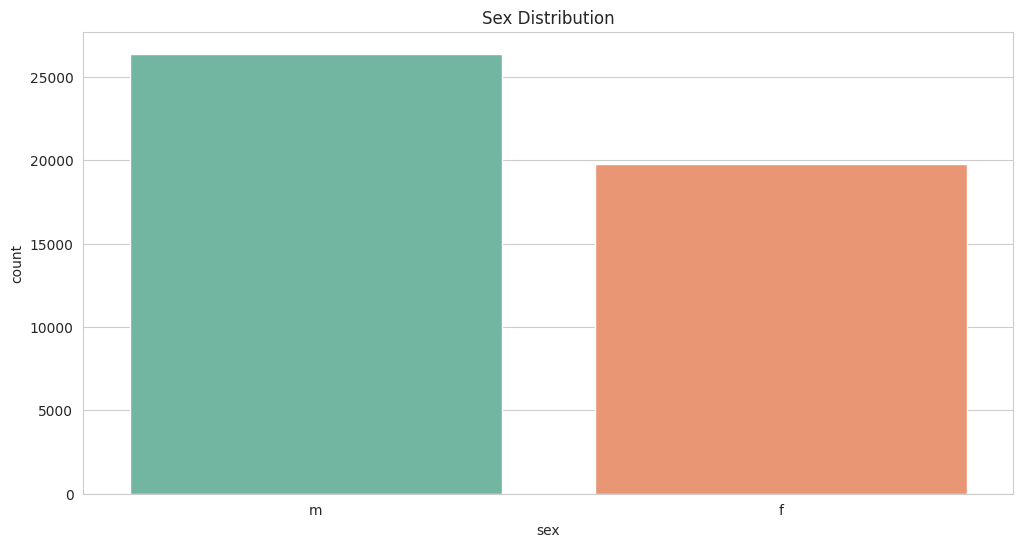

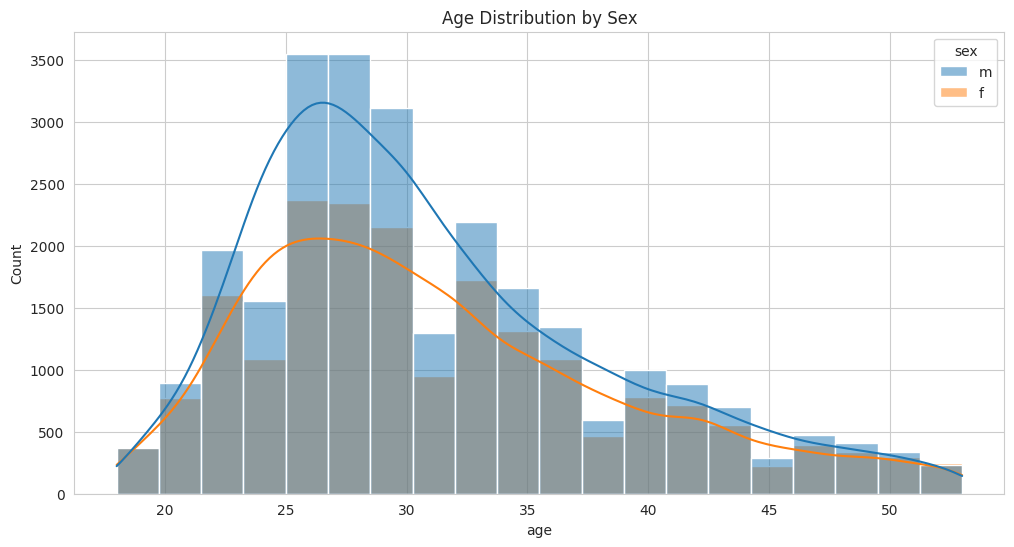

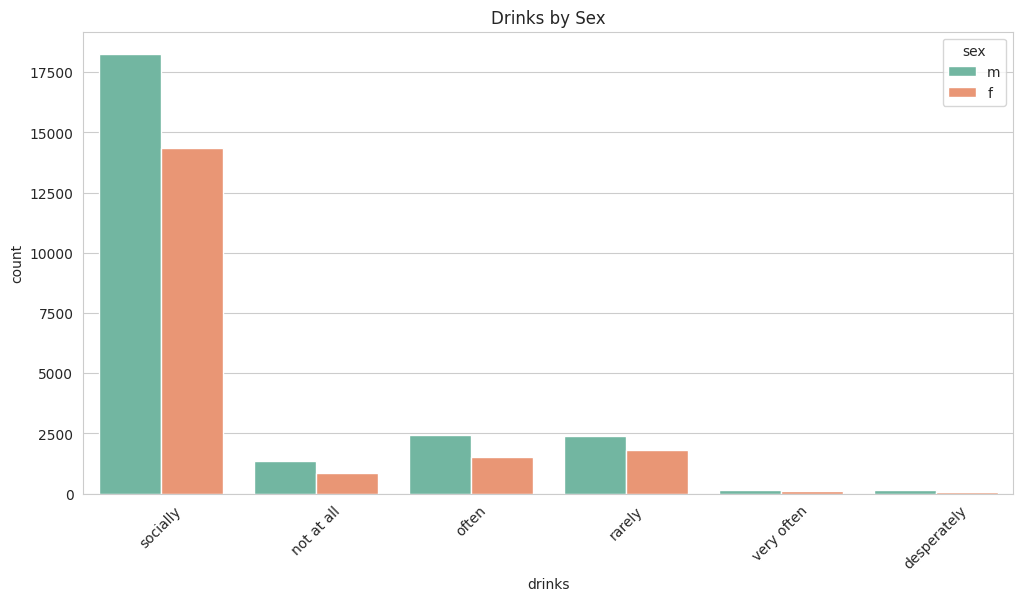

In [ ]:
def initial_visualizations(df):
    sns.set_style('whitegrid')  # Set plot style

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='sex', palette='Set2', hue='sex', dodge=False)
    plt.title('Sex Distribution')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.histplot(data=df, x='age', bins=20, hue='sex', kde=True)
    plt.title('Age Distribution by Sex')
    plt.show()

    plt.figure(figsize=(12, 6))
    sns.countplot(data=df, x='drinks', hue='sex', palette='Set2')
    plt.title('Drinks by Sex')
    plt.xticks(rotation=45)
    plt.show()

initial_visualizations(df)

In [ ]:
# Function for visualizing distributions after each cleaning step
def plot_distribution(df, column, title, hue=None, kind='count', rotation=0):
    """Helper function to plot distributions after each cleaning phase."""
    plt.figure(figsize=(12, 6))
    if kind == 'count':
        sns.countplot(data=df, x=column, hue=hue, palette='Set2')
    elif kind == 'hist':
        sns.histplot(df[column], kde=True, bins=20, hue=hue)
    plt.title(title)
    plt.xticks(rotation=rotation)
    plt.show()

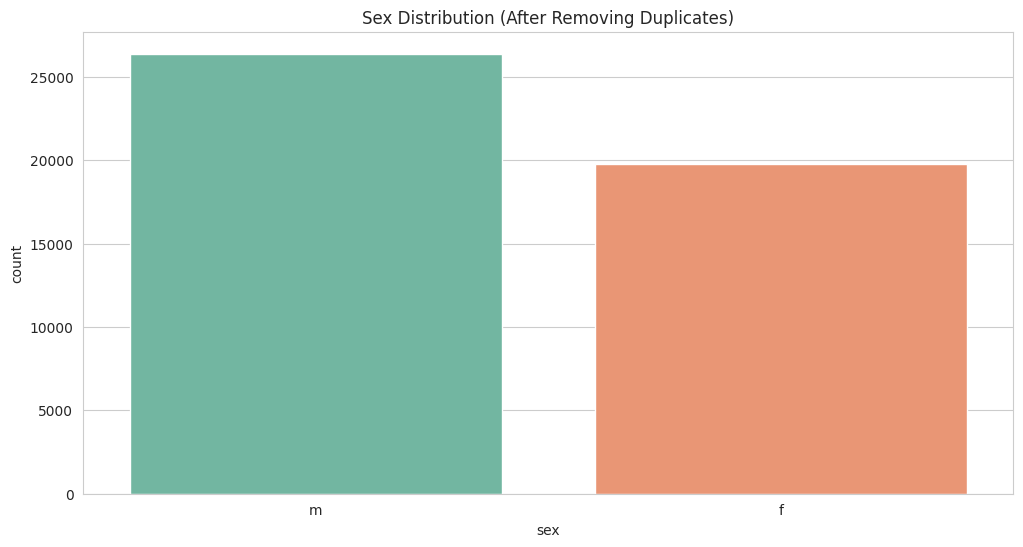

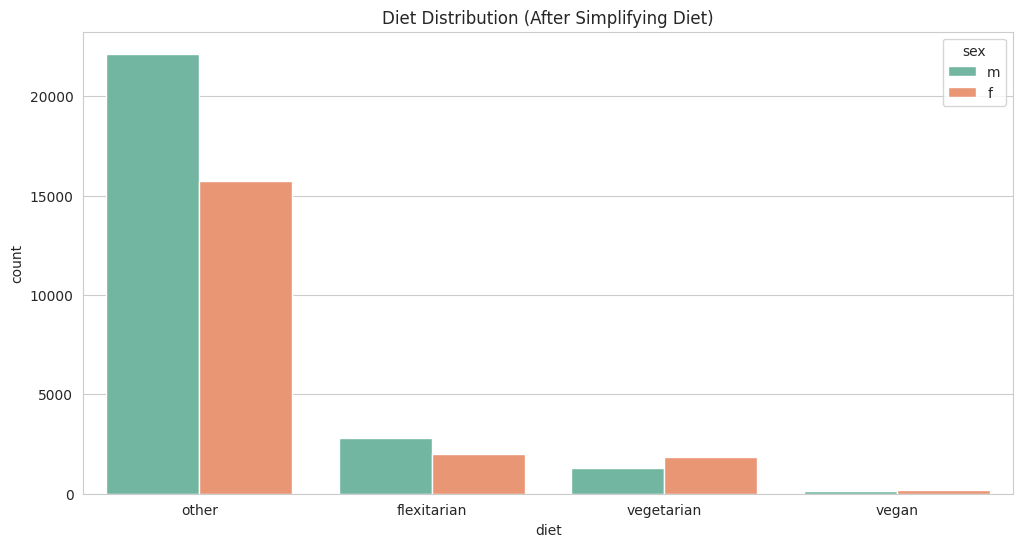

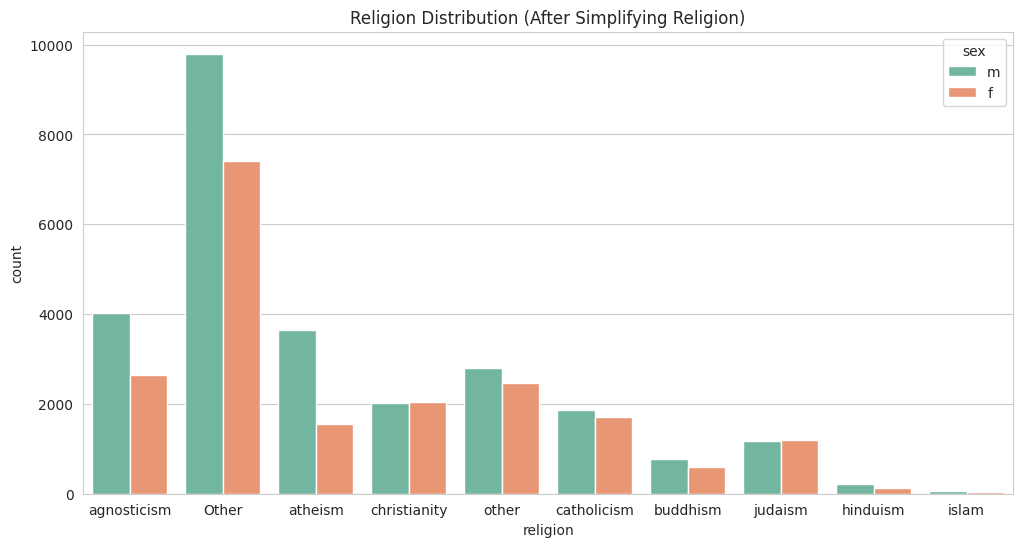

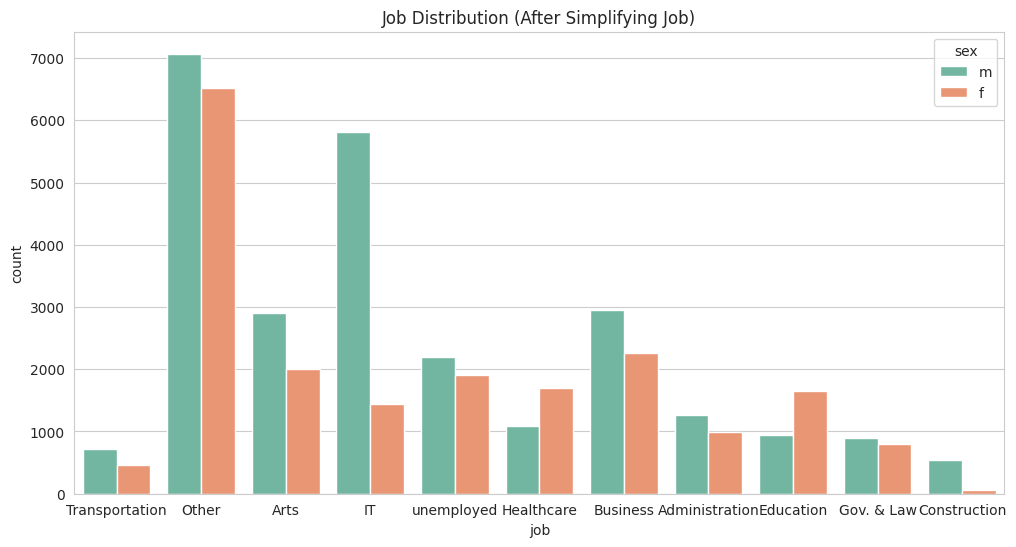

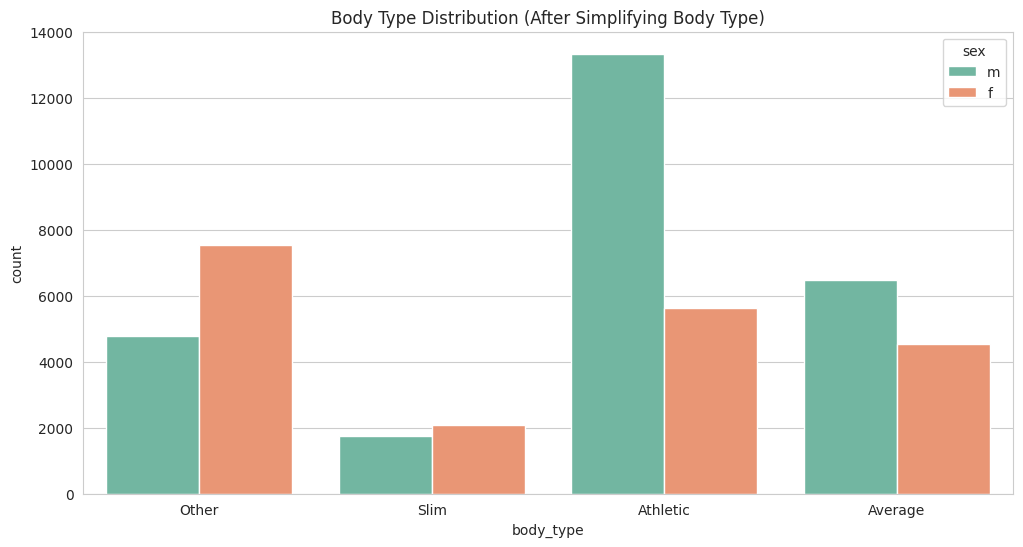

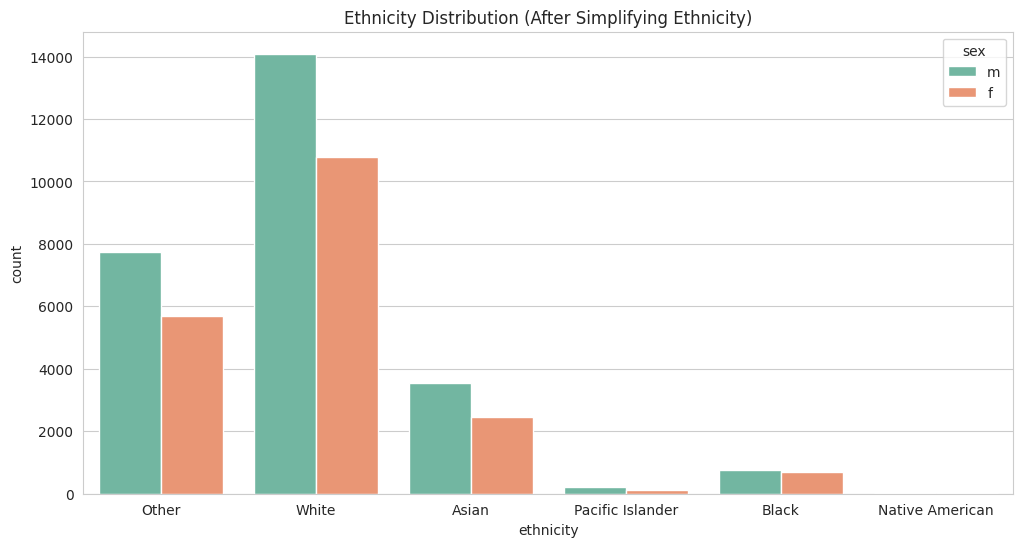

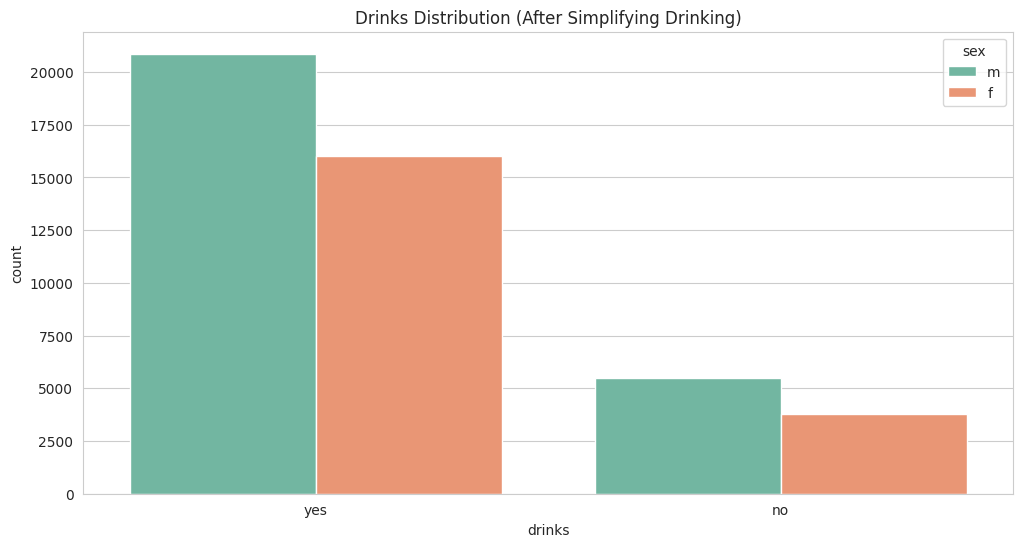

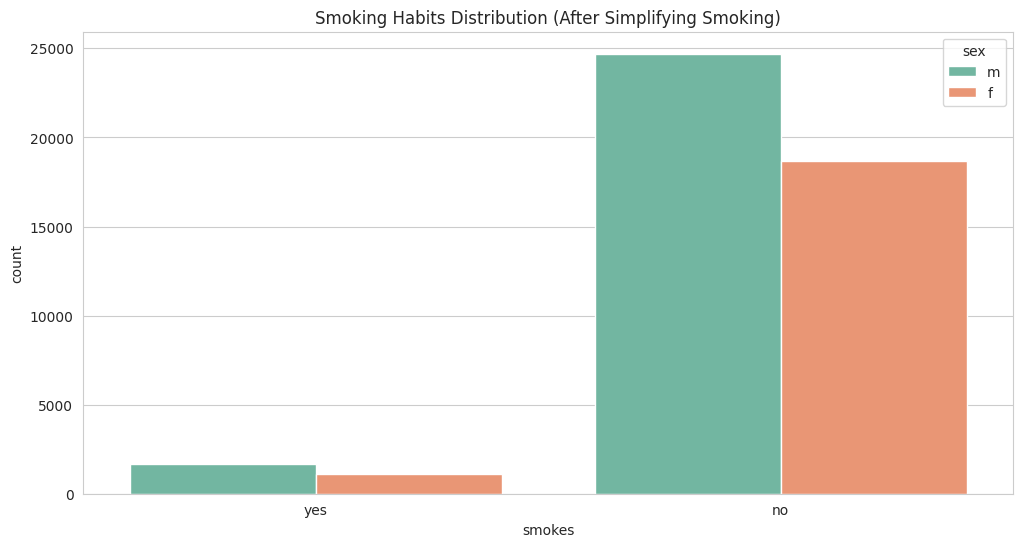

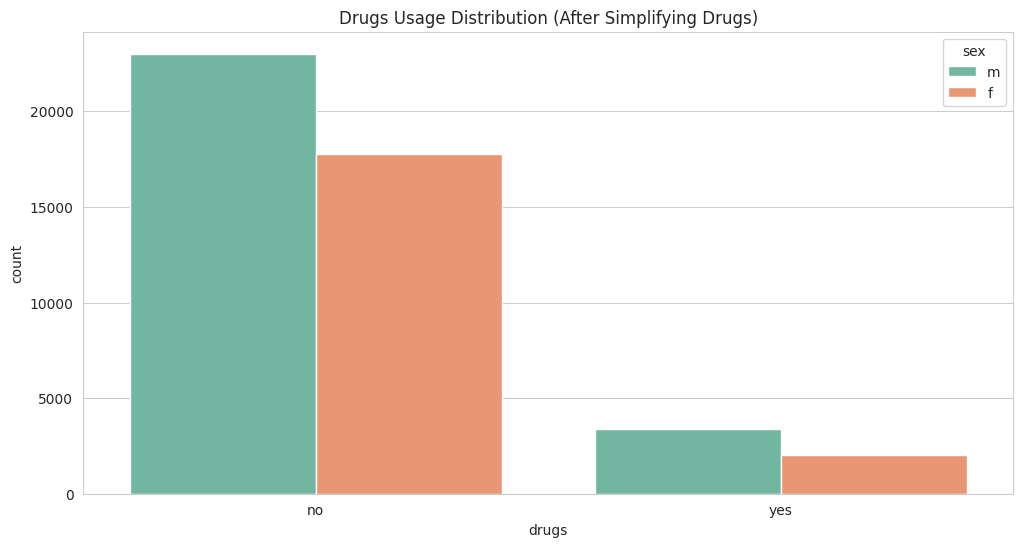

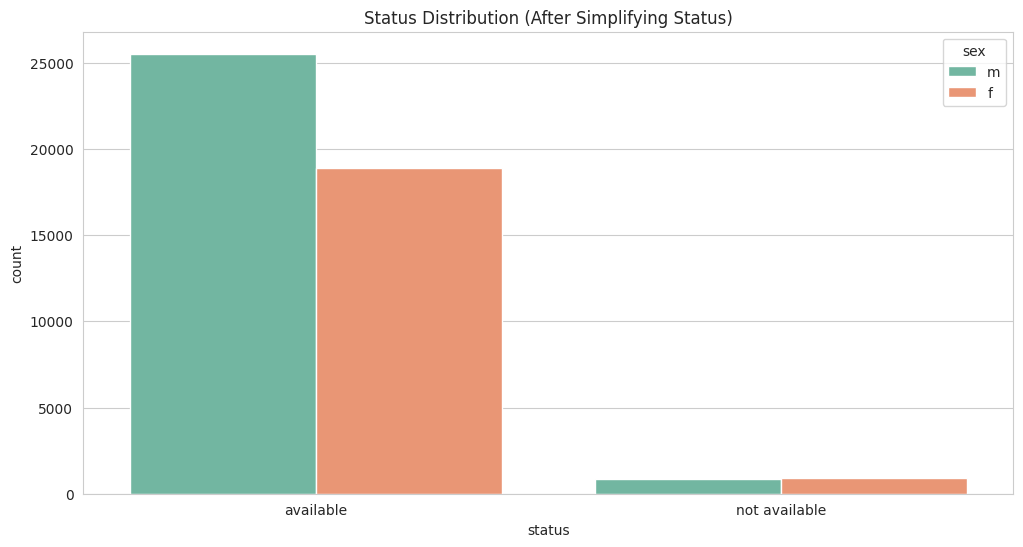

In [ ]:
# Data cleaning function with integrated visualizations
def clean_data_with_visualizations(df):
    # Step 1: Remove duplicates
    df = df.drop_duplicates()
    plot_distribution(df, 'sex', 'Sex Distribution (After Removing Duplicates)', hue='sex')

    # Step 2: Simplify diet
    if 'diet' in df.columns:
        diet_map = {
            'vegetarian': 'vegetarian',
            'vegan': 'vegan',
            'mostly vegetarian': 'vegetarian',
            'mostly vegan': 'vegan',
            'anything': 'flexitarian',
        }
        df['diet'] = df['diet'].map(diet_map).fillna('other')
        plot_distribution(df, 'diet', 'Diet Distribution (After Simplifying Diet)', hue='sex')

    # Step 3: Simplify religion
    if 'religion' in df.columns:
        df['religion'] = df['religion'].str.split().str[0].fillna('Other')
        plot_distribution(df, 'religion', 'Religion Distribution (After Simplifying Religion)', hue='sex')

    # Step 4: Simplify language (Bolor)


    # Step 5: Simplify job
    def simplify_job(job):
        """Maps job titles to predefined job categories."""
        if pd.isna(job):  # Handle missing values
            return 'Other'

        job = job.lower()  # Convert to lowercase for consistent matching

        # Define simplified job categories
        if job in ['artistic / musical / writer', 'entertainment / media']:
            return 'Arts'
        elif job in ['computer / hardware / software', 'science / tech / engineering']:
            return 'IT'
        elif job in ['banking / financial / real estate', 'sales / marketing / biz dev']:
            return 'Business'
        elif job in ['medicine / health']:
            return 'Healthcare'
        elif job in ['executive / management', 'clerical / administrative']:
            return 'Administration'
        elif job in ['education / academia']:
            return 'Education'
        elif job in ['construction / craftsmanship']:
            return 'Construction'
        elif job in ['political / government', 'law / legal services', 'military']:
            return 'Gov. & Law'
        elif job in ['transportation', 'hospitality / travel']:
            return 'Transportation'
        elif job in ['student', 'unemployed', 'retired']:
            return 'unemployed'
        else:
            return 'Other'  # Catch-all for rather not say, etc.

    # Apply the simplified job categories
    if 'job' in df.columns:
        df['job'] = df['job'].map(simplify_job)

    plot_distribution(df, 'job', 'Job Distribution (After Simplifying Job)', hue='sex')

    # Step 6: Simplify education (Bolor)

    # Step 7: Simplify body type
    if 'body_type' in df.columns:
        def simplify_body_type(body_type):
            """Maps body type values to predefined categories."""
            if pd.isna(body_type):  # Handle missing values
                return 'Other'

            body_type = str(body_type).lower()  # Convert to lowercase for consistent matching

            # Define mapping logic
            if any(keyword in body_type for keyword in ['slim', 'thin']):
                return 'Slim'
            elif any(keyword in body_type for keyword in ['athletic', 'fit', 'toned']):
                return 'Athletic'
            elif any(keyword in body_type for keyword in ['average', 'medium']):
                return 'Average'
            else:
                return 'Other'  # Catch-all for all other or unclear body types

        # Apply the simplification function to the body_type column
        df['body_type'] = df['body_type'].map(simplify_body_type)
        plot_distribution(df, 'body_type', 'Body Type Distribution (After Simplifying Body Type)', hue='sex')

    # Step 8: Simplify ethnicity
    def simplify_ethnicity(ethnicity):
        """Maps ethnicity values to predefined categories."""
        if pd.isna(ethnicity):  # Handle missing values
            return 'Other'

        ethnicity = ethnicity.lower()  # Ensure lowercase for consistent matching

        # Map ethnicity values to broader categories
        if ethnicity == 'native american':
            return 'Native American'
        elif ethnicity in ['asian', 'indian']:
            return 'Asian'
        elif ethnicity == 'black':
            return 'Black'
        elif ethnicity == 'pacific islander':
            return 'Pacific Islander'
        elif ethnicity in ['hispanic', 'latin']:
            return 'Hispanic / Latino'
        elif ethnicity in ['white', 'middle eastern']:
            return 'White'
        else:
            return 'Other'

    if 'ethnicity' in df.columns:
        df['ethnicity'] = df['ethnicity'].map(simplify_ethnicity)
        plot_distribution(df, 'ethnicity', 'Ethnicity Distribution (After Simplifying Ethnicity)', hue='sex')

    # Step 9: Simplify drinking, smoking, and drugs
    if 'drinks' in df.columns:
        df['drinks'] = df['drinks'].apply(lambda x: 'yes' if x in ['socially', 'often', 'very often'] else 'no')
        plot_distribution(df, 'drinks', 'Drinks Distribution (After Simplifying Drinking)', hue='sex')
    if 'smokes' in df.columns:
        df['smokes'] = df['smokes'].apply(lambda x: 'yes' if x == 'sometimes' else 'no')
        plot_distribution(df, 'smokes', 'Smoking Habits Distribution (After Simplifying Smoking)', hue='sex')
    if 'drugs' in df.columns:
        df['drugs'] = df['drugs'].apply(lambda x: 'yes' if x == 'sometimes' else 'no')
        plot_distribution(df, 'drugs', 'Drugs Usage Distribution (After Simplifying Drugs)', hue='sex')

    # Step 10: Simplify status
    if 'status' in df.columns:
        df['status'] = df['status'].apply(lambda x: 'available' if x in ['single', 'available'] else 'not available')
        plot_distribution(df, 'status', 'Status Distribution (After Simplifying Status)', hue='sex')

    return df

# Apply the data cleaning function with visualizations
cleaned_data = clean_data_with_visualizations(df)

In [ ]:
df.describe()

,age,height,income
count,46170.000000,46170.000000,46170.0
mean,31.098007,68.141910,-1.0
std,7.524771,3.803258,0.0
min,18.000000,59.000000,-1.0
25%,26.000000,65.000000,-1.0
50%,29.000000,68.000000,-1.0
75%,35.000000,71.000000,-1.0
max,53.000000,78.000000,-1.0


In [ ]:
# organize education column

def merge_education(education):
    if pd.isna(education):
        return np.nan

    education = str(education).lower()

    if 'dropped out' in education:
        return 'dropped out'
    elif 'graduated from' in education:
        return 'University/college graduated'
    elif 'working on' in education:
        return 'student'
    elif 'high school' in education:
        return 'high school'
    else:
        return 'other'

df['education'] = df['education'].apply(merge_education)
print(df['education'].value_counts())

education
University/college graduated    30289
student                          7976
dropped out                      1271
other                             976
high school                        59
Name: count, dtype: int64


In [ ]:
def clean_offspring(offspring):
    if pd.isna(offspring):
        return 'not specified'
    offspring = str(offspring).lower()
    offspring = offspring.replace('&', ' ')
    offspring = offspring.replace(';', ' ')
    offspring = offspring.replace('rsquo', '')

    #Remove text between '&' and ';' if present
    parts = offspring.split('&')
    if len(parts) > 1 and ';' in parts[1]:
        parts[1] = parts[1].split(';')[1]
        offspring = '&'.join(parts).strip()

    return offspring

df['offspring'] = df['offspring'].apply(clean_offspring)
print(df['offspring'].value_counts())

offspring
not specified                                28817
doesn  t have kids                            6176
doesn  t have kids, but might want them       2850
doesn  t have kids, but wants them            2754
doesn  t want kids                            1888
has a kid                                     1123
has kids                                       883
doesn  t have kids, and doesn  t want any      747
has kids, but doesn  t want more               212
wants kids                                     179
has a kid, and might want more                 144
has a kid, but doesn  t want more              138
might want kids                                133
has kids, and might want more                   76
has a kid, and wants more                       42
has kids, and wants more                         8
Name: count, dtype: int64


In [ ]:
def split_offspring(data):
    t = data.copy()
    not_mentioned = "Not specified"
    no_of_kids = []
    want_more_kids = []
    nofk_map = {"doesnt have kids": "Zero", "has a kid": "One", "has kids": "More_than_one"}
    wmk_map = {"and doesnt want any": "No", "doesn't want kids": "No", "but doesnt want more": "No",
               "but might want them": "Maybe", "and might want more": "Maybe", "might want kids": "Maybe",
               "but wants them": "Yes", "and wants more": "Yes", "wants kids": "Yes"}
    for e in t["offspring"]:
        splitted = e.split(", ")
        if len(splitted) == 2:
            no_of_kids.append(nofk_map.get(splitted[0], not_mentioned)) # Use get method with default value
            want_more_kids.append(wmk_map.get(splitted[1], not_mentioned)) # Use get method with default value
        else:
            if e in nofk_map:
                no_of_kids.append(nofk_map[e])
                want_more_kids.append(not_mentioned)
            elif e in wmk_map:  # Check if e is in wmk_map before accessing it
                no_of_kids.append(not_mentioned)
                want_more_kids.append(wmk_map[e])
            else: # If e is not in either dictionary, assign not_mentioned to both columns
                no_of_kids.append(not_mentioned)
                want_more_kids.append(not_mentioned)

    t["no_of_kids"] = no_of_kids
    t["want_more_kids"] = want_more_kids
    return t

In [ ]:
df = split_offspring(df)

In [ ]:
df = df.drop(columns=['offspring', 'last_online'])

In [ ]:
df['sign'] = df['sign'].astype(str).str.split(' ').str[0]

In [ ]:
df['sign'].value_counts()

,count
sign,
nan,9189
leo,3318
gemini,3224
libra,3170
virgo,3168
cancer,3137
taurus,3105
scorpio,3081
aries,3048


In [ ]:
def split_pet(data):
    t = data.copy()
    not_mentioned = "Not specified"
    pet_owner = []
    pet_lover = []
    for e in t["pets"]:
        # Check if e is a string before splitting
        if isinstance(e, str):
            # Initialize both values to not_mentioned for each row
            curr_pet_owner = not_mentioned
            curr_pet_lover = not_mentioned

            if 'likes dogs and likes cats' in e:
                curr_pet_lover = 'dog and cat'
            elif 'likes cats' in e:
                curr_pet_lover = 'cat'
            elif 'has cats' in e:
                curr_pet_owner = 'cat'
            elif 'likes dogs' in e:
                curr_pet_lover = 'dog'
            elif 'has dogs' in e:
                curr_pet_owner = 'dog'
            elif 'has dogs and has cats' in e:
                curr_pet_owner = 'dogs and cats'

            # Append the current values to the lists
            pet_owner.append(curr_pet_owner)
            pet_lover.append(curr_pet_lover)

        else:
            # Handle non-string values (e.g., float, NaN)
            pet_owner.append(not_mentioned)
            pet_lover.append(not_mentioned)

    t["pet owner"] = pet_owner
    t["pet lover"] = pet_lover
    return t

In [ ]:
df = split_pet(df)

In [ ]:
# prompt: create 5 bins out of column age
bins = [12, 19, 35, 50, 65, 100]
labels = ['Teen', 'Young Adult', 'Adult', 'Middle-Aged', 'Senior']

# Create a new column for age categories
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)


df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,sex,sign,smokes,speaks,status,no_of_kids,want_more_kids,pet owner,pet lover,age_group
0,22,a little extra,strictly anything,socially,never,student,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,m,gemini,sometimes,english,single,Not specified,Maybe,Not specified,dog and cat,Young Adult
2,38,thin,anything,socially,NaN,University/college graduated,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,m,pisces,no,"english, french, c++",available,Not specified,Not specified,cat,Not specified,Adult
4,29,athletic,NaN,socially,never,University/college graduated,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,m,aquarius,no,english,single,Not specified,Not specified,Not specified,dog and cat,Young Adult
5,29,average,mostly anything,socially,NaN,University/college graduated,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,m,taurus,no,"english (fluently), chinese (okay)",single,Not specified,Maybe,Not specified,cat,Young Adult
6,32,fit,strictly anything,socially,never,University/college graduated,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,f,virgo,NaN,english,single,Not specified,Not specified,Not specified,dog and cat,Young Adult


It shows that the most users in dating app belong to millenials.

**Visualization**

In [ ]:
df['speaks'].value_counts()

,count
speaks,
english,17176
english (fluently),4647
"english (fluently), spanish (poorly)",1509
"english (fluently), spanish (okay)",1462
"english (fluently), spanish (fluently)",1021
...,...
"english (fluently), chinese (fluently), japanese (poorly), korean (poorly), c++ (fluently)",1
"english (fluently), russian (fluently), french (okay), ukrainian (poorly), hebrew (okay)",1
"english, indonesian (poorly), french (okay), spanish (okay), hindi (poorly)",1


In [ ]:
#split the values in speaks_fluently by , and assign 'monolingual' if it has one value and 'bilingual' if it has 2 values, 'polylingual' if it has more values

def categorize_language(speaks_value):
    if pd.isna(speaks_value):
        return 'not specified'

    if isinstance(speaks_value, str):
        languages = [lang.strip() for lang in speaks_value.split(',') if lang.strip()]
        num_languages = len(languages)

        if num_languages == 1:
            return 'monolingual'
        elif num_languages == 2:
            return 'bilingual'
        else:
            return 'polylingual'
    else:
        return 'not specified'

df['language_category'] = df['speaks'].apply(categorize_language)
print(df['language_category'].value_counts())

language_category
monolingual      22255
bilingual        13457
polylingual      10416
not specified       42
Name: count, dtype: int64


In [ ]:
df['speaks_fluently'] = df['speaks'].copy()

In [ ]:
def get_value_before_fluently(speaks_value):
    if pd.isna(speaks_value):
        return 'not specified'

    if isinstance(speaks_value, str):
        parts = speaks_value.split(',')
        for i in range(len(parts)):
          if '(fluently)' in parts[i]:
            if i > 0:
              return parts[i].strip()
            elif 'english' in parts[i]:
              return 'english'
            else:
              return 'not specified'
    else:
        return 'not specified'

df['speaks_fluently'] = df['speaks_fluently'].apply(get_value_before_fluently)
print(df['speaks_fluently'].value_counts())

speaks_fluently
english                 20947
spanish (fluently)        398
french (fluently)         147
chinese (fluently)        120
english (fluently)         67
                        ...  
mongolian (fluently)        1
basque (fluently)           1
rotuman (fluently)          1
hawaiian (fluently)         1
icelandic (fluently)        1
Name: count, Length: 63, dtype: int64


In [ ]:
df = df.drop(columns=['pets', 'speaks'])

In [ ]:
df.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,sign,smokes,status,no_of_kids,want_more_kids,pet owner,pet lover,age_group,language_category,speaks_fluently
0,22,a little extra,strictly anything,socially,never,student,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,gemini,sometimes,single,Not specified,Maybe,Not specified,dog and cat,Young Adult,monolingual,None
2,38,thin,anything,socially,NaN,University/college graduated,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,pisces,no,available,Not specified,Not specified,cat,Not specified,Adult,polylingual,None
4,29,athletic,NaN,socially,never,University/college graduated,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,aquarius,no,single,Not specified,Not specified,Not specified,dog and cat,Young Adult,monolingual,None
5,29,average,mostly anything,socially,NaN,University/college graduated,"i'm an australian living in san francisco, but...",building awesome stuff. figuring out what's im...,imagining random shit. laughing at aforementio...,i have a big smile. i also get asked if i'm we...,...,taurus,no,single,Not specified,Maybe,Not specified,cat,Young Adult,bilingual,english
6,32,fit,strictly anything,socially,never,University/college graduated,life is about the little things. i love to lau...,digging up buried treasure,frolicking<br />\nwitty banter<br />\nusing my...,i am the last unicorn,...,virgo,NaN,single,Not specified,Not specified,Not specified,dog and cat,Young Adult,monolingual,None


In [ ]:
df.columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job', 'location',
       'orientation', 'religion', 'sex', 'sign', 'smokes', 'status',
       'no_of_kids', 'want_more_kids', 'pet owner', 'pet lover', 'age_group',
       'language_category', 'speaks_fluently'],
      dtype='object')

In [ ]:
clean_data = df.drop(columns=['essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9'])
clean_data.head()

,age,body_type,diet,drinks,drugs,education,ethnicity,height,income,job,...,sign,smokes,status,no_of_kids,want_more_kids,pet owner,pet lover,age_group,language_category,speaks_fluently
0,22,a little extra,strictly anything,socially,never,student,"asian, white",75.0,-1,transportation,...,gemini,sometimes,single,Not specified,Maybe,Not specified,dog and cat,Young Adult,monolingual,None
2,38,thin,anything,socially,NaN,University/college graduated,NaN,68.0,-1,NaN,...,pisces,no,available,Not specified,Not specified,cat,Not specified,Adult,polylingual,None
4,29,athletic,NaN,socially,never,University/college graduated,"asian, black, other",66.0,-1,artistic / musical / writer,...,aquarius,no,single,Not specified,Not specified,Not specified,dog and cat,Young Adult,monolingual,None
5,29,average,mostly anything,socially,NaN,University/college graduated,white,67.0,-1,computer / hardware / software,...,taurus,no,single,Not specified,Maybe,Not specified,cat,Young Adult,bilingual,english
6,32,fit,strictly anything,socially,never,University/college graduated,"white, other",65.0,-1,NaN,...,virgo,NaN,single,Not specified,Not specified,Not specified,dog and cat,Young Adult,monolingual,None


In [ ]:
# prompt: null value in speaks_fluently column

print(df['speaks_fluently'].isnull().sum())

23770
